In [1]:
import pandas as pd
import numpy as np

In [2]:
Column_names=['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','Target']

In [3]:
df = pd.read_csv('./kddcup.data.corrected.csv',names=Column_names)

In [4]:
d=df[df.Target != 'normal.']

In [5]:
d['Target'].value_counts()

smurf.              2807886
neptune.            1072017
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: Target, dtype: int64

In [6]:
r=dict(d['Target'].value_counts())

In [7]:
dos=["back.","land.","neptune.","pod.","smurf.","teardrop."]
u2r=["buffer_overflow.","loadmodule.","perl.","rootkit."]
r2l=["ftp_write.","guess_passwd.","imap.","multihop.","phf.","spy.","warezclient.","warezmaster."]
probe=["ipsweep.","nmap.","portsweep.","satan."]

In [8]:
a=[dos,u2r,r2l,probe]
for i in a:
    s=0
    for j in i:
        s=s+int(r[j])
    print(str(i),s)

['back.', 'land.', 'neptune.', 'pod.', 'smurf.', 'teardrop.'] 3883370
['buffer_overflow.', 'loadmodule.', 'perl.', 'rootkit.'] 52
['ftp_write.', 'guess_passwd.', 'imap.', 'multihop.', 'phf.', 'spy.', 'warezclient.', 'warezmaster.'] 1126
['ipsweep.', 'nmap.', 'portsweep.', 'satan.'] 41102


In [9]:
imp_attacks=[]
for i in sorted(zip(r.values(),r.keys()),reverse=True)[:5]:
    imp_attacks.append(i[1])

In [10]:
l=[]
for i in d['Target']:
    if i in imp_attacks:
        l.append(i)
    else:
        l.append('other')

In [11]:
d['attack_type']=np.array(l)

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14964\1659482420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['attack_type']=np.array(l)


In [12]:
d=d.drop(['Target'],axis=1)

In [13]:
d['attack_type'].value_counts()

smurf.        2807886
neptune.      1072017
satan.          15892
ipsweep.        12481
portsweep.      10413
other            6961
Name: attack_type, dtype: int64

In [14]:
limit=int((15892+12481)/2)
print(limit)

14186


In [15]:
attack_type1=d[d['attack_type']=="smurf."]
attack_type2=d[d['attack_type']=="neptune."]
attack_type3=d[d['attack_type']=="satan."]
attack_type4=d[d['attack_type']=="ipsweep."]
attack_type5=d[d['attack_type']=="portsweep."]
attack_type6=d[d['attack_type']=="other"]

In [16]:
attack_type1=attack_type1.sample(limit)
attack_type2=attack_type2.sample(limit)

In [17]:
attack_balance=pd.concat([attack_type1,attack_type2,attack_type3,attack_type4,attack_type5,attack_type6],axis=0)

In [18]:
attack_balance=attack_balance.sample(frac=1).reset_index()

In [19]:
attack_balance

,index,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,499706,0,tcp,http,SF,54540,8314,0,0,0,...,255,1.00,0.00,0.00,0.0,0.00,0.0,0.03,0.03,other
1,2219344,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.00,0.0,0.00,0.00,smurf.
2,899004,0,tcp,other,REJ,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.07,0.0,0.93,1.00,satan.
3,1463720,0,tcp,other,S0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.0,0.11,1.0,0.89,0.00,satan.
4,1981456,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.00,0.0,0.00,0.00,smurf.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74114,418881,0,icmp,eco_i,SF,8,0,0,0,0,...,255,1.00,0.00,1.00,0.5,0.00,0.0,0.00,0.00,ipsweep.
74115,2718729,0,icmp,ecr_i,SF,1032,0,0,0,0,...,255,1.00,0.00,1.00,0.0,0.00,0.0,0.00,0.00,smurf.
74116,3776135,0,tcp,private,S0,0,0,0,0,0,...,6,0.02,0.08,0.00,0.0,1.00,1.0,0.00,0.00,neptune.
74117,808586,0,tcp,private,RSTR,0,0,0,0,0,...,1,0.00,0.98,0.97,0.0,0.00,0.0,0.97,1.00,portsweep.


In [20]:
attack_balance['attack_type'].value_counts()

satan.        15892
smurf.        14186
neptune.      14186
ipsweep.      12481
portsweep.    10413
other          6961
Name: attack_type, dtype: int64

In [21]:
temp_data=attack_balance.drop(['service','protocol_type','flag'],axis=1)

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

temp_data["attack_type_c"] = ord_enc.fit_transform(temp_data[["attack_type"]])

In [23]:
temp_data['attack_type_c'].value_counts()

4.0    15892
5.0    14186
1.0    14186
0.0    12481
3.0    10413
2.0     6961
Name: attack_type_c, dtype: int64

In [24]:
temp_data=temp_data.drop(['attack_type','index'],axis=1)

In [25]:
x = temp_data.drop('attack_type_c', axis = 1).values
y = temp_data['attack_type_c']

In [26]:
y = y.astype(int)

print(x.shape)
print(y.shape)

(74119, 38)
(74119,)


In [27]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(random_state=20,criterion='entropy',max_depth=12)
dt.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=20)

In [28]:
col = []
f = []

for i,column in enumerate(temp_data.drop('attack_type_c', axis = 1)):
    print('The feature importance for {} is : {}'.format(column, dt.feature_importances_[i]))
    
    col.append(column)
    f.append(dt.feature_importances_[i])

The feature importance for duration is : 0.0
The feature importance for src_bytes is : 0.36332853336292237
The feature importance for dst_bytes is : 0.0004578548458684857
The feature importance for land is : 0.0
The feature importance for wrong_fragment is : 3.663140030745832e-05
The feature importance for urgent is : 0.0
The feature importance for hot is : 0.0
The feature importance for num_failed_logins is : 0.0
The feature importance for logged_in is : 0.0
The feature importance for num_compromised is : 0.0
The feature importance for root_shell is : 0.0
The feature importance for su_attempted is : 0.0
The feature importance for num_root is : 0.0
The feature importance for num_file_creations is : 0.0
The feature importance for num_shells is : 0.0
The feature importance for num_access_files is : 0.0
The feature importance for num_outbound_cmds is : 0.0
The feature importance for is_host_login is : 0.0
The feature importance for is_guest_login is : 0.0
The feature importance for count 

In [29]:
f_df = zip(col, f)
f_df = pd.DataFrame(f_df, columns = ['Feature','Feature Importance'])

f_df = f_df.sort_values('Feature Importance', ascending = False).reset_index()

In [30]:
f_df

,index,Feature,Feature Importance
0,1,src_bytes,0.363329
1,31,dst_host_diff_srv_rate,0.187460
2,20,srv_count,0.166483
3,23,rerror_rate,0.122930
4,33,dst_host_srv_diff_host_rate,0.062286
5,21,serror_rate,0.032175
6,32,dst_host_same_src_port_rate,0.028690
7,28,dst_host_count,0.024212
8,19,count,0.006098
9,36,dst_host_rerror_rate,0.004733


In [31]:
imp_columns = f_df['Feature'][0:19]

In [32]:
data_imp=temp_data[imp_columns]

In [33]:
data_imp['service']=attack_balance['service']
data_imp['protocol_type']=attack_balance['protocol_type']
data_imp['flag']=attack_balance['flag']

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14964\442130733.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp['service']=attack_balance['service']
C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14964\442130733.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp['protocol_type']=attack_balance['protocol_type']
C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14964\442130733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [34]:
data_imp['attack']=temp_data['attack_type_c']

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14964\3170872547.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp['attack']=temp_data['attack_type_c']


In [35]:
data_imp.columns

Index(['src_bytes', 'dst_host_diff_srv_rate', 'srv_count', 'rerror_rate',
       'dst_host_srv_diff_host_rate', 'serror_rate',
       'dst_host_same_src_port_rate', 'dst_host_count', 'count',
       'dst_host_rerror_rate', 'dst_host_serror_rate', 'dst_bytes',
       'dst_host_srv_count', 'same_srv_rate', 'dst_host_same_srv_rate',
       'srv_rerror_rate', 'dst_host_srv_serror_rate', 'wrong_fragment',
       'srv_diff_host_rate', 'service', 'protocol_type', 'flag', 'attack'],
      dtype='object')

In [97]:
data_imp.to_csv('multi_class_data.csv')

In [36]:
data_imp.shape

(74119, 23)

In [37]:
labels=data_imp['service'].unique()
values=[]
for i in labels:
    values.append(len(data_imp.loc[(data_imp['service']==i)]))

ar=sorted(list(zip(values,labels)),reverse=True)
for i in ar:
    print("{} : {}".format(i[1],i[0]),end=",")

private : 26718,other : 15126,ecr_i : 14504,eco_i : 12570,http : 2269,ftp_data : 832,ftp : 364,telnet : 154,finger : 94,smtp : 52,gopher : 52,remote_job : 48,mtp : 48,rje : 44,whois : 43,link : 43,ctf : 43,domain : 42,imap4 : 41,ssh : 39,name : 39,time : 36,discard : 34,systat : 33,echo : 33,daytime : 32,netstat : 31,uucp_path : 30,netbios_dgm : 30,pop_2 : 29,login : 29,klogin : 29,bgp : 29,supdup : 28,nntp : 28,hostnames : 28,uucp : 27,sunrpc : 27,sql_net : 27,printer : 27,netbios_ssn : 26,iso_tsap : 26,csnet_ns : 26,auth : 26,pop_3 : 25,netbios_ns : 25,courier : 25,vmnet : 23,exec : 23,Z39_50 : 22,shell : 21,nnsp : 20,http_443 : 18,ldap : 16,kshell : 15,efs : 14,domain_u : 9,X11 : 6,tim_i : 5,pm_dump : 5,urp_i : 3,http_8001 : 2,harvest : 2,aol : 2,http_2784 : 1,IRC : 1,

In [38]:
ser_c=[]
for i in ar[8:]:
    ser_c.append(i[1])
data_imp['service']=data_imp['service'].replace(ser_c,'cc')

C:\Users\SaiRamMaganti\AppData\Local\Temp\ipykernel_14964\2564009027.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp['service']=data_imp['service'].replace(ser_c,'cc')


In [39]:
data_enc = pd.get_dummies(data_imp, drop_first=True)

In [40]:
data_enc.shape

(74119, 40)

In [41]:
data_temp=data_enc.drop(['attack'],axis=1)

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

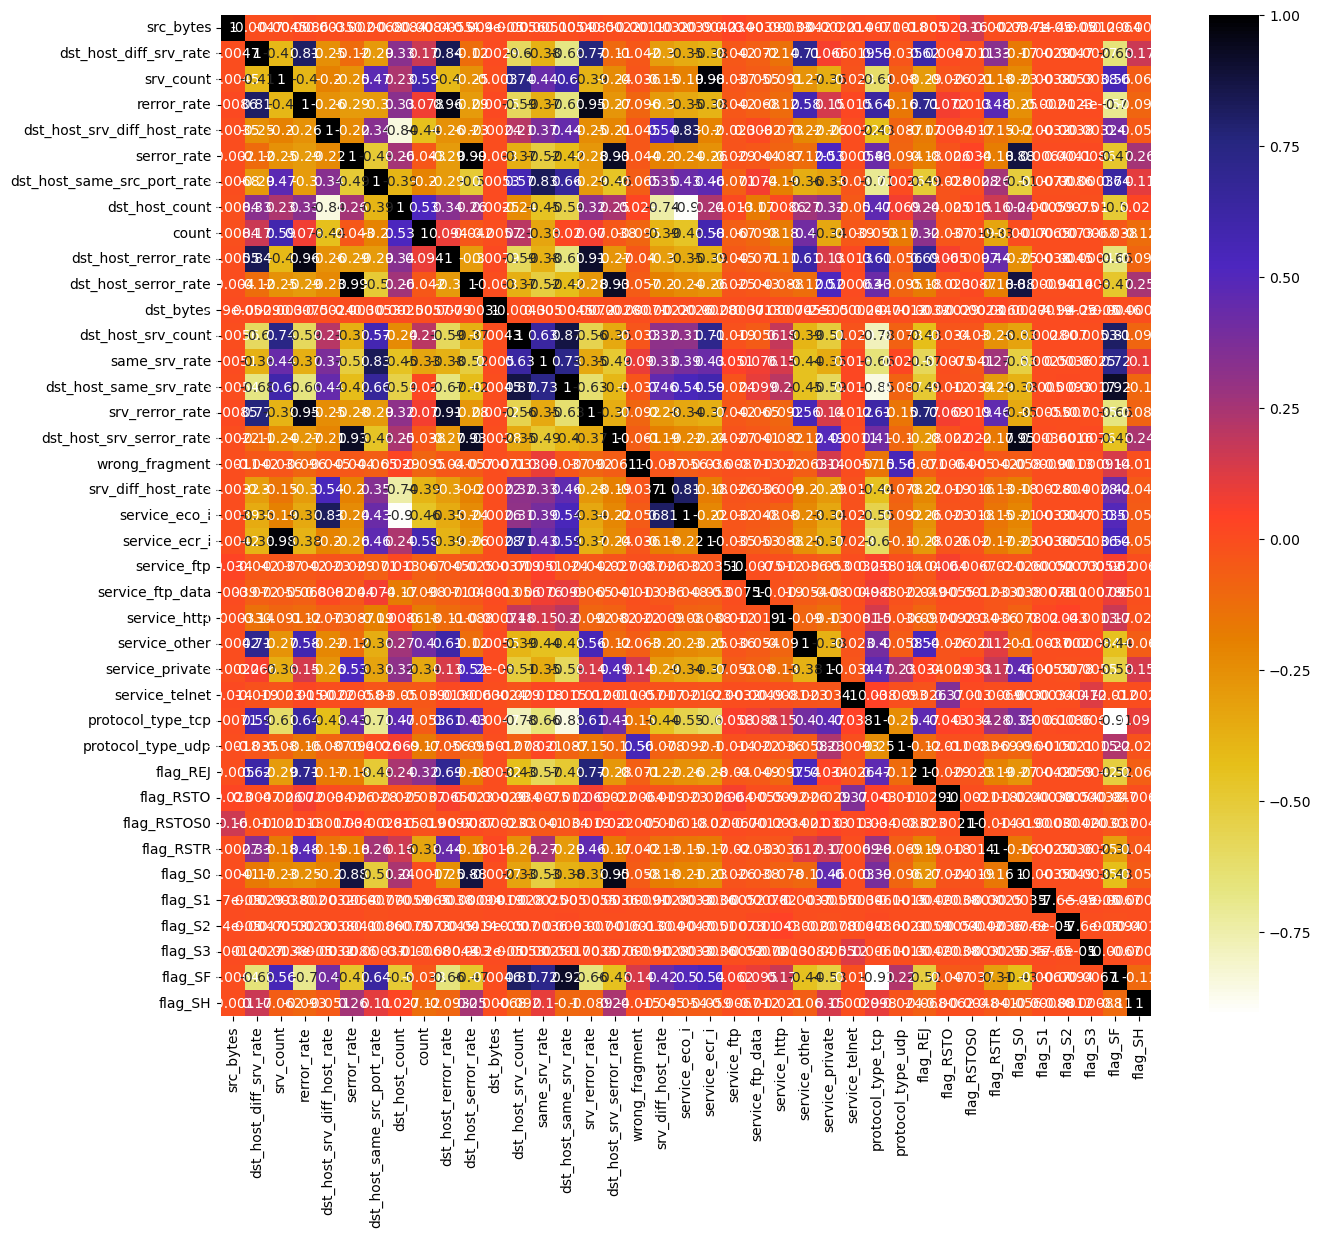

In [43]:
plt.figure(figsize=(15,13))
cor=data_temp.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [44]:
cor_col=set()
for i in range(len(cor.columns)):
    for j in range(i):
        if (cor.iloc[i,j])>0.75:
            temp=cor.columns[i]
            cor_col.add(temp)

In [45]:
print(cor_col)
print(len(cor_col))

{'service_eco_i', 'srv_rerror_rate', 'flag_REJ', 'flag_S0', 'service_ecr_i', 'same_srv_rate', 'rerror_rate', 'dst_host_same_srv_rate', 'dst_host_srv_serror_rate', 'dst_host_serror_rate', 'dst_host_rerror_rate', 'flag_SF'}
12


In [46]:
data_temp = data_temp.drop(list(cor_col),axis=1)

In [47]:
data_temp['attack']=data_enc['attack']

In [63]:
x=data_temp.drop(['attack'],axis=1)
y=data_temp['attack']

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=1)  

In [65]:
from sklearn.tree import DecisionTreeClassifier  

DT_clf= DecisionTreeClassifier(criterion='entropy', random_state=42)
DT_clf.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [81]:
y_pred= DT_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.999190501888829 0.998932869650611


In [86]:
from sklearn.ensemble import RandomForestClassifier

RD_clf = RandomForestClassifier(criterion='gini',random_state=42)
RD_clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [87]:
y_pred= RD_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.9994063680518078 0.9992490557940913


In [88]:
from sklearn.ensemble import GradientBoostingClassifier

GD_clf = GradientBoostingClassifier(n_estimators = 100 ,learning_rate = 0.01)
GD_clf.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [91]:
y_pred= GD_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.9770642201834863 0.9684788086384883


In [90]:
from sklearn.ensemble import ExtraTreesClassifier

ET_clf = ExtraTreesClassifier(n_estimators = 100)
ET_clf.fit(x_train, y_train)

ExtraTreesClassifier()

In [92]:
y_pred= ET_clf.predict(x_test)
print(accuracy_score(y_test,y_pred), f1_score(y_test,y_pred,average='macro'))

0.999190501888829 0.9989699893260643


In [98]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression

x, y = make_classification(n_samples=74119, n_features=26, n_informative=5, n_redundant=5, n_classes=6, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

n_scores = cross_val_score(model, x, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [99]:
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.489 (0.007)
